In [6]:
# Import libraries
import os
import magpy as mp
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import diffxpy.api as de
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

expt_path = "/proj/magness/"
cds010_path = "/proj/magness/CDS010_hashtag"
cds014_path = "/proj/magness/CDS014_hashtag"
cds015_path = "/proj/magness/CDS015_hashtag"
combined_path = "/proj/magness/CDS010-014-015_combined"

# sc.set_figure_params(dpi_save = 300, dpi = 200, format = 'svg')
figdir = combined_path+'/figures/computational_supp_figs/'
if not os.path.exists(figdir): os.makedirs(figdir)
sc.settings.figdir = figdir

plt.rcParams ['figure.facecolor'] = 'white'

contrast_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                    '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
                    '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

SI_palette = ['#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
              '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']
Colon_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff']

region_palette = ['#7f007f','#FF5700','#3cb371','#EF4344','#4344EF','#EDEC2C']

paneth_palette = ['#4169e1','#7f007f']
goblet_palette = ['#7f007f']
leiden_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                  '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#ffa07a',
                  '#7f007f','#ff00ff']
CSI_leiden_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff',
                      '#ccccff','#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e',
                      '#adff2f','#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

['SI_earlyAE', 'SI_AE2', 'SI_tuft', 'C_earlyACC', 'C_goblet', 'SI_matureAE', 'C_BEST4', 'SI_intermAE', 'C_lateACC', 'SI_goblet', 'C_EEC', 'C_tuft', 'C_ISC', 'SI_ISC', 'SI_BEST4', 'SI_TA', 'C_TA', 'SI_secretory_prog', 'C_secretory_prog', 'SI_EEC', 'SI_TA2', 'SI_paneth', 'SI_FAE']


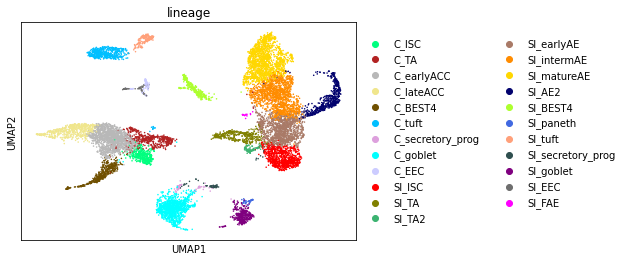

In [2]:
## Figure 19

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

print([a for a in adata.obs.lineage.unique()])

lineage_order = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','C_secretory_prog','C_goblet',
                 'C_EEC','SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_BEST4',
                 'SI_paneth','SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC','SI_FAE']

adata.obs.lineage.cat.reorder_categories(lineage_order, inplace=True)

sc.pl.umap(adata, color = 'lineage', palette = contrast_palette)

/proj/anaconda/envs/rnaseq/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


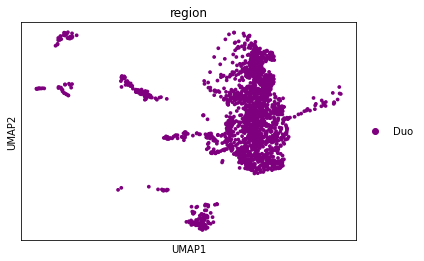

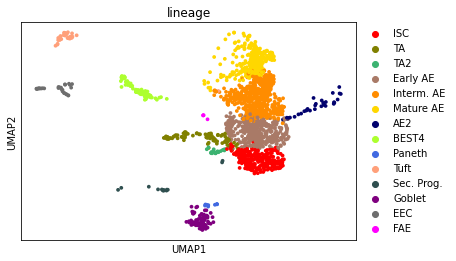

Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


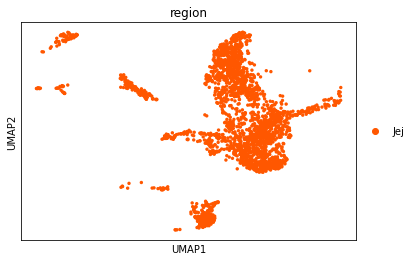

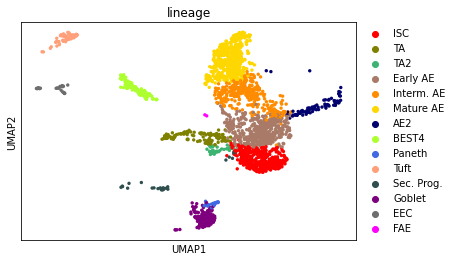

Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


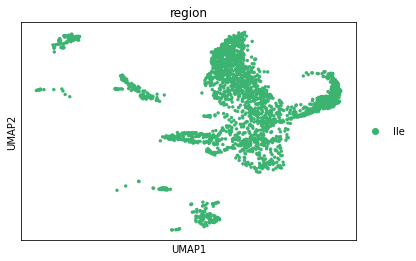

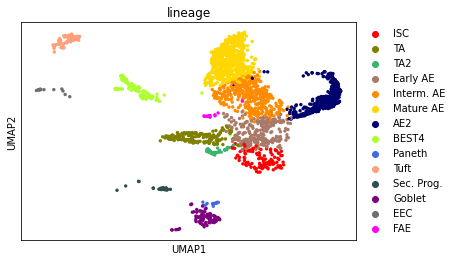

Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


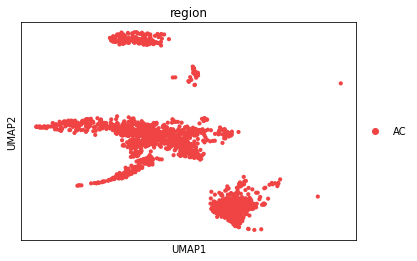

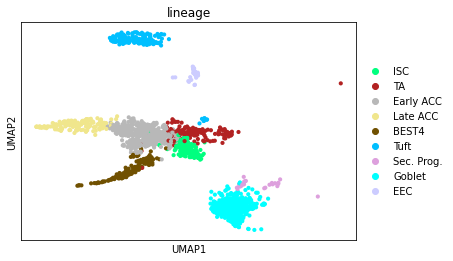

Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


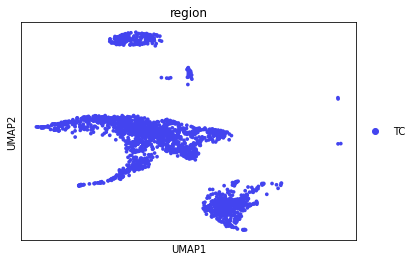

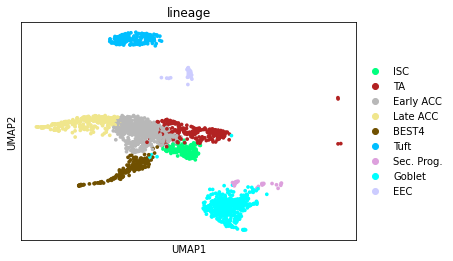

Trying to set attribute `.obs` of view, copying.
... storing 'lineage' as categorical


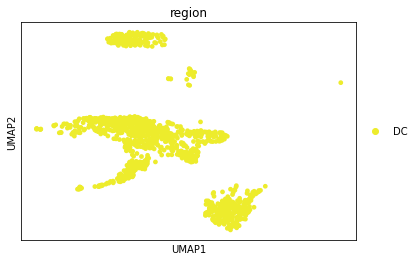

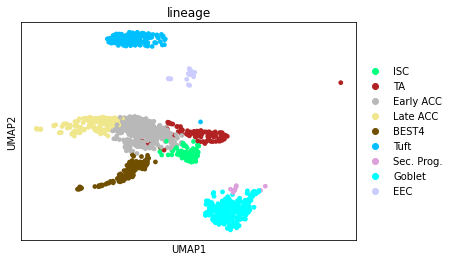

In [3]:
##Figure 19 -  UMAP final clustering split by region

region_order = ['Duo','Jej','Ile','AC','TC','DC']
adata.obs.region.cat.reorder_categories(region_order, inplace=True)


SI_order = ['ISC','TA','TA2','Early AE','Interm. AE','Mature AE','AE2','BEST4','Paneth','Tuft','Sec. Prog.','Goblet','EEC','FAE']
Colon_order = ['ISC','TA','Early ACC','Late ACC','BEST4','Tuft','Sec. Prog.','Goblet','EEC']
                 

lineage_map = {'C_ISC':'ISC',
               'C_TA':'TA',
               'C_earlyACC':'Early ACC',
               'C_lateACC':'Late ACC',
               'C_BEST4':'BEST4',
               'C_tuft':'Tuft',
               'C_secretory_prog':'Sec. Prog.',
               'C_goblet':'Goblet',
               'C_EEC':'EEC',
               'SI_ISC':'ISC',
               'SI_TA':'TA',
               'SI_TA2':'TA2',
               'SI_earlyAE':'Early AE',
               'SI_intermAE':'Interm. AE',
               'SI_matureAE':'Mature AE',
               'SI_AE2':'AE2',
               'SI_BEST4':'BEST4',
               'SI_paneth':'Paneth',
               'SI_tuft':'Tuft',
               'SI_secretory_prog':'Sec. Prog.',
               'SI_goblet':'Goblet',
               'SI_EEC':'EEC',
               'SI_FAE':'FAE'}

# print(adata)
adata.obs.lineage= adata.obs.lineage.map(lineage_map)

loc = 0

for region in region_order:
    region_color = [region_palette[loc]]
    subset = adata[adata.obs.region==region]
    sc.pl.umap(subset, color = ['region'],  palette = region_color)#, save = f'_{region}_cells_v1')
    if region in ['Duo','Jej','Ile']:
        subset.obs.lineage.cat.reorder_categories(SI_order, inplace=True)
        sc.pl.umap(subset, color = 'lineage', palette = SI_palette)#, save = f'_{region}_lineage_v1')
    elif region in ['AC', 'TC','DC']:
        subset.obs.lineage.cat.reorder_categories(Colon_order, inplace=True)
        sc.pl.umap(subset, color = 'lineage', palette = Colon_palette)#, save = f'_{region}_lineage_v1')
    loc = loc+1

Running initial filtering for: m-019 ...
----------------------------------------------------------------------------------------------------- 

Reading data from /proj/magness/CDS014_hashtag/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 7815 × 36607
    var: 'gene_ids', 'feature_types', 'genome'
Data contains 7815 cells and 36607 genes.
Annotating data with hashtag information...
Fitting noise distribution models...
Optimization terminated successfully.
         Current function value: 4.669980
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 5.343242
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 4.664982
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 5.792009
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 5.164744
         Iterations: 4

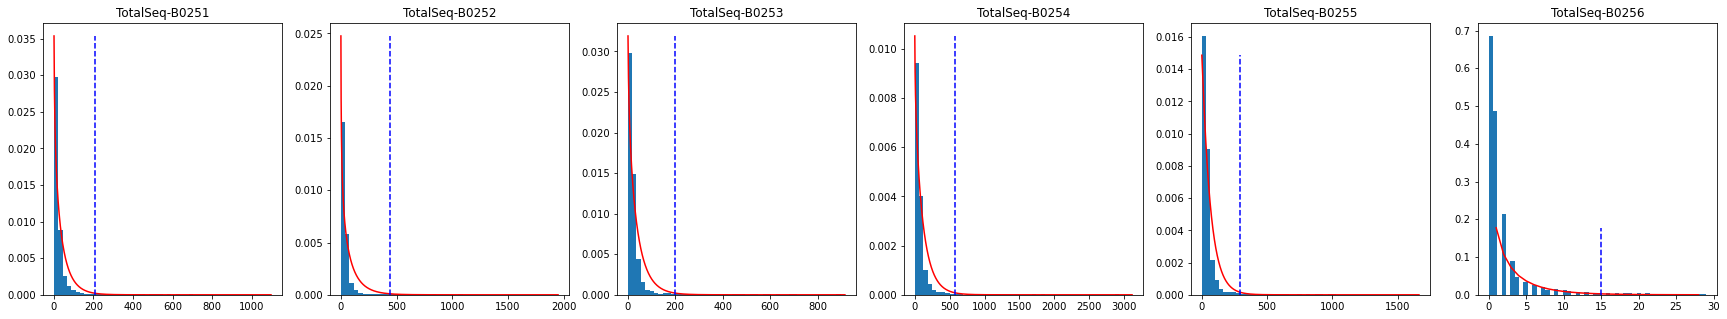

                   gene_ids     feature_types genome  cluster0_mean  \
TotalSeq-B0251     duodenum  Antibody Capture                 23.67   
TotalSeq-B0252      jejunum  Antibody Capture                 33.76   
TotalSeq-B0253        ileum  Antibody Capture                 23.76   
TotalSeq-B0254    colon_asc  Antibody Capture                 89.05   
TotalSeq-B0255   colon_desc  Antibody Capture                 48.31   
TotalSeq-B0256  colon_trans  Antibody Capture                  6.39   

                cluster1_mean  cluster2_mean  cluster3_mean  cluster4_mean  \
TotalSeq-B0251          59.63       1,400.41          96.07         107.15   
TotalSeq-B0252         134.45         102.67         156.46         135.96   
TotalSeq-B0253       1,665.90          60.07          79.83          90.61   
TotalSeq-B0254         193.44         138.48         254.92       4,678.22   
TotalSeq-B0255         128.67          76.51       3,575.79         173.71   
TotalSeq-B0256           1.60     

... storing 'cluster_str' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
... storing 'hash_label' as categorical


Multiplets -  {0: 1491, 1: 5221, 2: 835, 3: 192, 4: 54, 5: 14, 6: 8}
Tags -  {'Multiplet': 1103, 'Negative': 1491, 'TotalSeq-B0251': 971, 'TotalSeq-B0252': 1107, 'TotalSeq-B0253': 1176, 'TotalSeq-B0254': 1014, 'TotalSeq-B0255': 749, 'TotalSeq-B0256': 204}
1103 cells identified as multiplets. 6712/7815 cells remaining.


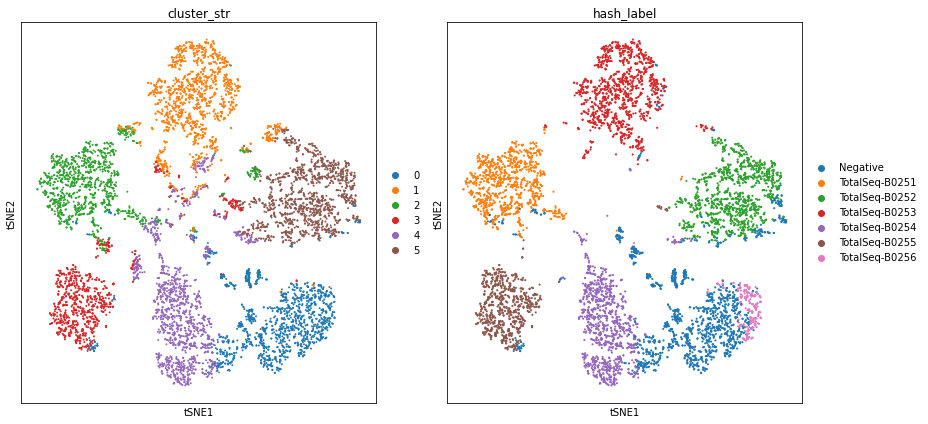

Trying to set attribute `.obs` of view, copying.



Subsetting out detected multiplets
6430 cells and 21377 genes kept based on minimum QC.
AnnData object with n_obs × n_vars = 6430 × 21377
    obs: 'hash_label', 'hash_cluster', 'n_genes', 'species', 'tissue', 'hashed', 'sex', 'group', 'treatment'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
Annotation complete.



AnnData object with n_obs × n_vars = 6430 × 21377
    obs: 'hash_label', 'hash_cluster', 'n_genes', 'species', 'tissue', 'hashed', 'sex', 'group', 'treatment', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [7]:
##Figure 20 - distributions of hashtag reads and k-means for region assignment

# mp.pipeline.annotate(cds010_path, sample_ID='m-014',hash_clusters=7, save = False, write_pfx = 'Donor2_CDS010')
mp.pipeline.annotate(cds014_path, sample_ID='m-019',hash_clusters=6, save = False)#, write_pfx = 'Donor1_CDS014')
# mp.pipeline.annotate(cds015_path, sample_ID='m-021',hash_clusters=7, save = False, write_pfx = 'Donor3_CDS015')

Reading data from /proj/magness/CDS010_hashtag/annotated_adata.h5ad

Reading data from /proj/magness/CDS014_hashtag/annotated_adata.h5ad

Reading data from /proj/magness/CDS015_hashtag/annotated_adata.h5ad



... storing 'donor' as categorical
... storing 'gene_ids-0' as categorical
... storing 'mt-0' as categorical
... storing 'ribo-0' as categorical
... storing 'hb-0' as categorical
... storing 'gene_ids-1' as categorical
... storing 'mt-1' as categorical
... storing 'ribo-1' as categorical
... storing 'hb-1' as categorical
... storing 'gene_ids-2' as categorical
... storing 'mt-2' as categorical
... storing 'ribo-2' as categorical
... storing 'hb-2' as categorical


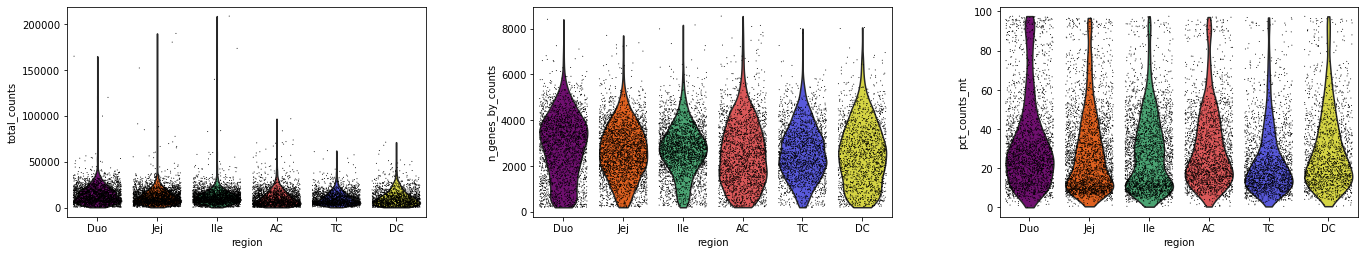

Reading data from /proj/magness/CDS010_hashtag/preprocessed_adata.h5ad

Reading data from /proj/magness/CDS014_hashtag/preprocessed_adata.h5ad

Reading data from /proj/magness/CDS015_hashtag/preprocessed_adata.h5ad



... storing 'donor' as categorical
... storing 'gene_ids-0' as categorical
... storing 'mt-0' as categorical
... storing 'ribo-0' as categorical
... storing 'hb-0' as categorical
... storing 'gene_ids-1' as categorical
... storing 'mt-1' as categorical
... storing 'ribo-1' as categorical
... storing 'hb-1' as categorical
... storing 'gene_ids-2' as categorical
... storing 'mt-2' as categorical
... storing 'ribo-2' as categorical
... storing 'hb-2' as categorical


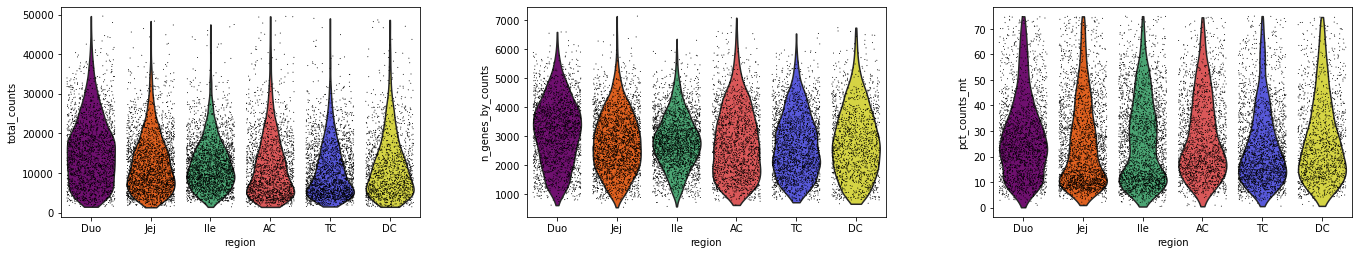

In [11]:
##Figure 21 - Violin plots of qc parameters

##first chunk is for pre-filtering distribution parameters. Swap donor and region to replicate figures.

adata10 = mp.load(cds010_path,1)
adata14 = mp.load(cds014_path,1)
adata15 = mp.load(cds015_path,1)

adata10.obs['donor'] = "Donor 2"
donor10_map = {
    'TotalSeq-B0251':"Duo",
    'TotalSeq-B0252':"Jej",
    'TotalSeq-B0253':"Ile",
    'TotalSeq-B0254':"AC",
    'TotalSeq-B0255':"TC",
    'TotalSeq-B0256':"DC"}
adata10.obs['region'] = adata10.obs['hash_label'].map(donor10_map)

adata14.obs['donor'] = "Donor 1"
donor14_map = {
    'TotalSeq-B0251':"Duo",
    'TotalSeq-B0252':"Jej",
    'TotalSeq-B0253':"Ile",
    'TotalSeq-B0254':"AC",
    'TotalSeq-B0255':"DC",
    'TotalSeq-B0256':"TC"}
adata14.obs['region'] = adata14.obs['hash_label'].map(donor14_map)
adata14.obs['region'] = adata14.obs['region'].astype('category')

adata15.obs['donor'] = "Donor 3"
donor15_map = {
    'TotalSeq-B0251':"Duo",
    'TotalSeq-B0252':"Jej",
    'TotalSeq-B0253':"Ile",
    'TotalSeq-B0254':"AC",
    'TotalSeq-B0255':"DC",
    'TotalSeq-B0256':"TC"}
adata15.obs['region'] = adata15.obs['hash_label'].map(donor15_map)

adata = adata10.concatenate(adata14, adata15, join='outer')

# adata.obs['donor'] = adata.obs['donor'].astype('category')
adata.obs['region'] = adata.obs['region'].astype('category')
# donor_order = ['Donor 1','Donor 2','Donor 3']
region_order = ['Duo','Jej','Ile','AC','TC','DC']

adata.obs.region.cat.reorder_categories(region_order, inplace=True)

sc.pl.violin(adata, ['total_counts','n_genes_by_counts','pct_counts_mt'], groupby = 'region', jitter=0.4, 
             multi_panel=True, palette = region_palette) #, save = f"_alldonors_pre_qc_filtering_by_region")

##Second chunk is for post-filtering distribution of qc parameters. Swap donor and region to replicate figures.

adata10 = mp.load(cds010_path,2)
adata14 = mp.load(cds014_path,2)
adata15 = mp.load(cds015_path,2)

adata10.obs['donor'] = "Donor 2"
adata10.obs['region'] = adata10.obs['hash_label'].map(donor10_map)

adata14.obs['donor'] = "Donor 1"
adata14.obs['region'] = adata14.obs['hash_label'].map(donor14_map)

adata15.obs['donor'] = "Donor 3"
adata15.obs['region'] = adata15.obs['hash_label'].map(donor15_map)

adata = adata10.concatenate(adata14, adata15, join='outer')
adata.obs['region'] = adata.obs['region'].astype('category')

sc.pl.violin(adata, ['total_counts','n_genes_by_counts','pct_counts_mt'], groupby = 'region', jitter=0.4, 
             multi_panel=True, palette = region_palette)#,save = f"_alldonors_post_qc_filtering_by_region")
